In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/final(2).csv')

In [ ]:
data.head(20)

,comment_text,Binary
0,"Hey man, I'm really not trying to edit war. It...",0
1,Hey... what is it..\n@ | talk .\nWhat is it......,1
2,"""\nMore\nI can't make any real suggestions on ...",0
3,"Bye! \n\nDon't look, come or think of comming ...",1
4,"You, sir, are my hero. Any chance you remember...",0
5,You are gay or antisemmitian? \n\nArchangel WH...,1
6,"""\n\nCongratulations from me as well, use the ...",0
7,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
8,Your vandalism to the Matt Shirvington article...,0
9,I'm Sorry \n\nI'm sorry I screwed around with ...,1


In [ ]:
data.shape

(43702, 2)

In [ ]:
data.isnull().sum()

comment_text    0
Binary          0
dtype: int64

In [ ]:
data.describe()

,Binary
count,43702.000000
mean,0.500000
std,0.500006
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
data["Binary"].value_counts()

Binary
0    21851
1    21851
Name: count, dtype: int64

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import contractions

nltk.download('wordnet')

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
import numpy as np
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess(data):
    data = re.sub(r"'s\b", " is", data)
    data = re.sub("#", "", data)
    data = re.sub("@[A-Za-z0-9]+", "", data)
    data = re.sub(r"http\S+", "", data)
    data = contractions.fix(data)
    data = re.sub(r"[^a-zA-Z]", " ", data)
    data = data.lower().strip()

    data = [token for token in data.split() if token not in combined_stopwords]

    data = [token for token in data if len(token)>2]

    cleaned_data = ''
    for token in data:
        cleaned_data = cleaned_data + lemmatizer.lemmatize(token) + ' '

    return cleaned_data

In [ ]:
cleaned_text = []
for txt in data['comment_text']:
    cleaned_text.append(preprocess(txt))

In [ ]:
cleaned_text[:5]

['hey man really trying edit war guy constantly removing relevant information talking edits instead talk page care formatting actual info ',
 'hey talk exclusive group taliban good destroying self appointed purist gang asks question anti social destructive non contribution ask sityush clean behavior issue nonsensical warning ',
 'make real suggestion improvement wondered section statistic later subsection type accident think reference need tidying exact format date format later preference formatting style reference want let know appears backlog article review guess delay reviewer turn listed relevant form wikipedia good article nominationstransport ',
 'bye look come think comming tosser ',
 'sir hero chance remember page ']

In [ ]:
data['cleaned_text'] = cleaned_text
data.head(10)

,comment_text,Binary,cleaned_text
0,"Hey man, I'm really not trying to edit war. It...",0,hey man really trying edit war guy constantly ...
1,Hey... what is it..\n@ | talk .\nWhat is it......,1,hey talk exclusive group taliban good destroyi...
2,"""\nMore\nI can't make any real suggestions on ...",0,make real suggestion improvement wondered sect...
3,"Bye! \n\nDon't look, come or think of comming ...",1,bye look come think comming tosser
4,"You, sir, are my hero. Any chance you remember...",0,sir hero chance remember page
5,You are gay or antisemmitian? \n\nArchangel WH...,1,gay antisemmitian archangel white tiger meow g...
6,"""\n\nCongratulations from me as well, use the ...",0,congratulation use tool talk
7,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,fuck filthy mother as dry
8,Your vandalism to the Matt Shirvington article...,0,vandalism matt shirvington article reverted ba...
9,I'm Sorry \n\nI'm sorry I screwed around with ...,1,sorry sorry screwed talk page bad know templat...


In [ ]:
all_words = []
for t in data['cleaned_text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words))

['hey', 'man', 'really', 'trying', 'edit', 'war', 'guy', 'constantly', 'removing', 'relevant', 'information', 'talking', 'edits', 'instead', 'talk', 'page', 'care', 'formatting', 'actual', 'info', 'hey', 'talk', 'exclusive', 'group', 'taliban', 'good', 'destroying', 'self', 'appointed', 'purist', 'gang', 'asks', 'question', 'anti', 'social', 'destructive', 'non', 'contribution', 'ask', 'sityush', 'clean', 'behavior', 'issue', 'nonsensical', 'warning', 'make', 'real', 'suggestion', 'improvement', 'wondered']


65398

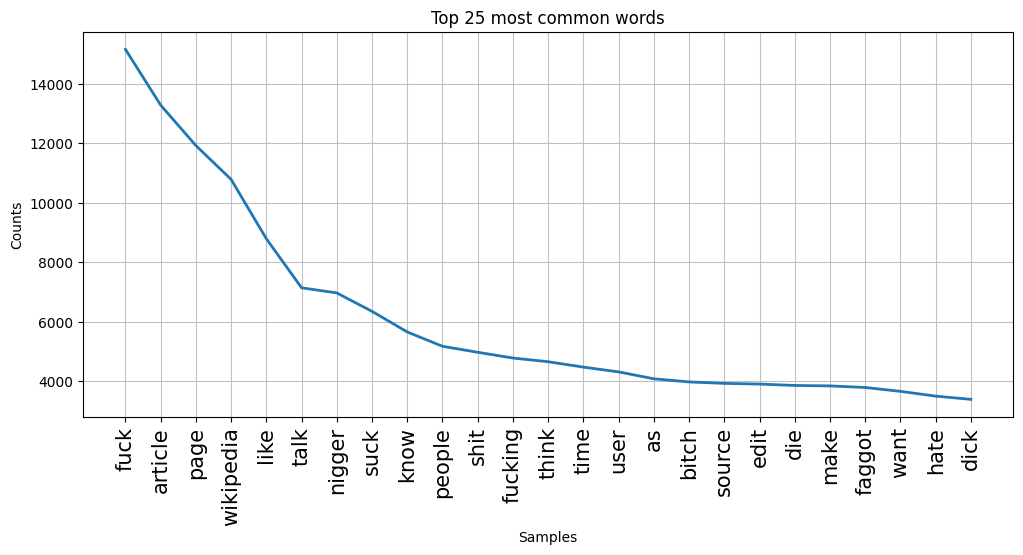

In [ ]:
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
domain_stopwords = ['page', 'article', 'people', 'as', 'people', 'user','wikipedia','source','edit']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [ ]:
data.shape

(43702, 3)

In [ ]:
TFIDF = TfidfVectorizer()
TFIDF_features = TFIDF.fit_transform(data['cleaned_text'])

In [ ]:
TFIDF_features.shape

(43702, 65392)

In [ ]:
print(TFIDF_features)

  (0, 28539)	0.24579561872144542
  (0, 584)	0.2611005794721933
  (0, 21647)	0.33535663331072985
  (0, 8771)	0.21648240553784623
  (0, 41821)	0.12618598129322214
  (0, 56540)	0.13838079859034005
  (0, 28861)	0.22257789021980334
  (0, 17622)	0.18873540685792348
  (0, 56556)	0.2365508041311569
  (0, 28565)	0.18671524827014654
  (0, 47725)	0.2510980242421597
  (0, 47855)	0.24313471506695064
  (0, 11887)	0.30555515287456053
  (0, 24784)	0.20802754320043848
  (0, 62463)	0.2236909729071506
  (0, 17583)	0.1641357401929166
  (0, 59182)	0.20712200716259646
  (0, 46944)	0.17890962400045118
  (0, 34938)	0.21130713816504043
  (0, 26128)	0.21374778683170034
  (1, 62502)	0.1499928108163721
  (1, 39718)	0.24658264830644572
  (1, 29649)	0.13618257846112966
  (1, 5540)	0.18107468450651276
  (1, 10467)	0.1916213499536546
  :	:
  (43699, 21501)	0.6532611951840999
  (43699, 20089)	0.6118766008600659
  (43699, 11164)	0.44593366792222944
  (43700, 41124)	0.3210077619640006
  (43700, 26180)	0.3497066929790734

In [ ]:
X = TFIDF_features
Y = data['Binary'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(43702, 65392) (34961, 65392) (8741, 65392)


In [ ]:
print (X_train)

  (0, 1413)	0.5248286319759106
  (0, 22480)	0.5248286319759106
  (0, 8877)	0.4917334114355684
  (0, 52128)	0.2801782565648339
  (0, 47192)	0.29151233945583316
  (0, 11084)	0.20935321035943905
  (1, 49669)	0.5764257897126049
  (1, 44342)	0.51881416084191
  (1, 27520)	0.24083752955345697
  (1, 49679)	0.37396771639887205
  (1, 64076)	0.2461548162184855
  (1, 23795)	0.21207343725597358
  (1, 31879)	0.17707676893517213
  (1, 46911)	0.25256105891539427
  (2, 60387)	0.36947336114034585
  (2, 23473)	0.39389263899595933
  (2, 6616)	0.4681940631023167
  (2, 30441)	0.296767232630078
  (2, 1242)	0.32008888521700884
  (2, 33378)	0.23048226346760153
  (2, 3748)	0.2619621928117289
  (2, 41518)	0.33111566074388743
  (2, 63485)	0.1581213199653452
  (2, 38846)	0.2054713166660824
  (3, 23045)	0.6110709225569199
  :	:
  (34960, 31623)	0.058419545560282546
  (34960, 46899)	0.06529661614521029
  (34960, 31416)	0.08306845900439122
  (34960, 43406)	0.36376149728956314
  (34960, 9757)	0.2868617794609798
  (349

In [ ]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, Y_train)

print(LR.score(X_train, Y_train))
print(LR.score(X_test, Y_test))

0.9413918366179457
0.9115661823589978


In [ ]:
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, Y_train)

print(LR1.score(X_train, Y_train))
print(LR1.score(X_test, Y_test))

0.8976001830611252
0.8987530030888914


In [ ]:
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, Y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.8953209  0.89417687 0.89439359 0.89176201 0.89061785]
89.33 0.18


In [ ]:
SVD = TruncatedSVD()

In [ ]:
from sklearn.model_selection import cross_validate, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = data['cleaned_text'].values

Y = data['Binary'].values

TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=3, max_features=65392)


LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

TFIDF_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )

results = cross_validate(TFIDF_pipe, X, Y, cv=kfold, scoring='accuracy', return_train_score=True)

print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)

TFIDF_pipe.fit(X, Y)



89.92 0.1
89.28 0.35


Pipeline(steps=[('TFIDF',
                 TfidfVectorizer(max_features=65392, min_df=3,
                                 stop_words=['page', 'article', 'people', 'as',
                                             'people', 'user', 'wikipedia',
                                             'source', 'edit', 'both', 'couldn',
                                             'although', 'might', 'a', 'become',
                                             'more', 'almost', 'anyway', 'only',
                                             'being', 'least', 'just', 'detail',
                                             'isn', 'sincere', 'myself', 'been',
                                             'theirs', 'has', 'ever', ...])),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [ ]:
with open('/content/drive/MyDrive/model.pkl', 'wb') as file:
    pickle.dump((TFIDF_pipe, TFIDF, LR1), file)

In [ ]:


from google.colab import drive
drive.mount('/content/drive')
!pip install contractions


import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import contractions

nltk.download('wordnet')

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
import numpy as np
import pickle

import pickle

with open('/content/drive/MyDrive/model.pkl', 'rb') as file:
    TFIDF_pipe, TFIDF, LR1 = pickle.load(file)

def preprocess(data):
    data = re.sub(r"'s\b", " is", data)
    data = re.sub("#", "", data)
    data = re.sub("@[A-Za-z0-9]+", "", data)
    data = re.sub(r"http\S+", "", data)
    data = contractions.fix(data)
    data = re.sub(r"[^a-zA-Z]", " ", data)
    data = data.lower().strip()

    data = [token for token in data.split() if token not in combined_stopwords]

    data = [token for token in data if len(token)>2]

    cleaned_data = ''
    for token in data:
        cleaned_data = cleaned_data + lemmatizer.lemmatize(token) + ' '

    return cleaned_data

new_data = ['I love you']

cleaned_data = [preprocess(text) for text in new_data]

transformed_data = TFIDF.transform(cleaned_data)

predictions = LR1.predict(transformed_data)

print(predictions)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[0]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
new_data = ['']

cleaned_data = [preprocess(text) for text in new_data]

transformed_data = TFIDF.transform(cleaned_data)

predictions = LR1.predict(transformed_data)

print(predictions)

[1]
